In [86]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms

from SpeedDataset import SpeedDataset
from Net import Net
from utils import *

seed = np.random.seed(42)

# Data

20400 items


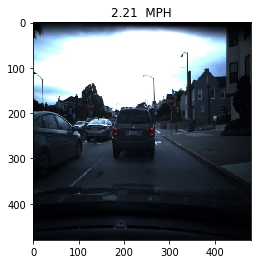

In [2]:
dataset = SpeedDataset('vidCaps/')
print(len(dataset), 'items')
dataset.show_item(20399)

# Train

In [4]:
net = Net()

In [5]:
optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

In [6]:
train = [dataset[i] for i in range(20400) if i <= 18000]
val = [dataset[i] for i in range(20400) if i > 18000]

In [7]:
train_X = [i['image'] for i in train]
train_y = [i['label'] for i in train]

val_X = [i['image'] for i in val]
val_y = [i['label'] for i in val]

print(len(train_X), len(train_y), len(val_X), len(val_y))

18001 18001 2399 2399


In [8]:
train_X = torch.stack(train_X)
val_X = torch.stack(val_X)
print(type(train_X), type(val_X))

<class 'torch.Tensor'> <class 'torch.Tensor'>


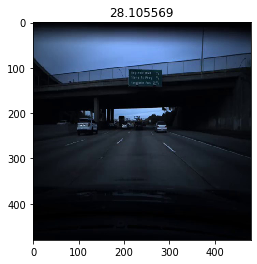

In [9]:
plt.title(train_y[0])
plt.imshow(train_X[0])

In [78]:
input = torch.randn(1, 3, 32, 32)
out = net(input)
print(out.shape)

torch.Size([1, 32, 28, 28])


In [80]:
model = torch.hub.load('pytorch/vision:v0.6.0', 'resnet18', pretrained=True)

Using cache found in /home/andrew/.cache/torch/hub/pytorch_vision_v0.6.0


In [125]:
model.fc.out_features = 1000
model.fc.out_features

1000

In [126]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [127]:
batch_X = train_X[0:0+BS]
batch_X = batch_X.view(-1, 3, 480, 480)
print(batch_X.shape)

torch.Size([10, 3, 480, 480])


In [128]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [129]:
input_tensor = transforms.ToPILImage(mode='RGB')(batch_X[0])
input_tensor = preprocess(input_tensor)
input_batch = input_tensor.unsqueeze(0)

In [130]:
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

In [132]:
with torch.no_grad():
    output = model(input_batch)

print(output.shape)

print(output[0].shape)

torch.Size([1, 1000])
torch.Size([1000])
